In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Data/2011.csv', skiprows=1, low_memory=False)
df = df.drop(columns=['id', 'member_id'])

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,5000.0,5000.0,4975.0,36 months,0.11,162.87,B,B2,NaN,10+ years,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,0.15,59.83,C,C4,Ryder,< 1 year,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,0.16,84.33,C,C5,NaN,10+ years,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,0.13,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,0.13,67.79,B,B5,University Medical Group,1 year,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# df["int_rate"] = df.int_rate.astype(float)

In [4]:
df_using = df[['int_rate', 'grade']]

df_using = df_using.dropna()

In [5]:
df_using = pd.get_dummies(df_using)
df_using.head()

,int_rate,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,0.11,0,1,0,0,0,0,0
1,0.15,0,0,1,0,0,0,0
2,0.16,0,0,1,0,0,0,0
3,0.13,0,0,1,0,0,0,0
4,0.13,0,1,0,0,0,0,0


In [6]:
X = df_using[['grade_A','grade_B','grade_C','grade_D','grade_E', 'grade_F','grade_G',]]
y = df_using['int_rate'].values.reshape(-1,1)
print (X.shape, y.shape)

(42535, 7) (42535, 1)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [9]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
X_train_scaled[0]

array([ 1.78046774, -0.63699599, -0.50986554, -0.40729227, -0.29387296,
       -0.17942797, -0.11139461])

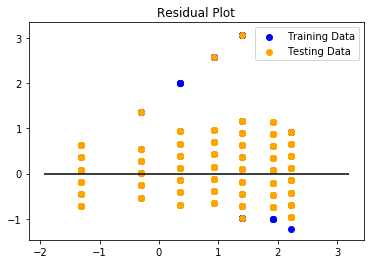

In [12]:
prediction = model.predict(X_test_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.09588380833897897, R2: 0.9021256721410916


In [15]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.09631505482985635, R2: 0.9016854731005309


In [16]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.09582723181237011, R2: 0.90218342317967


In [17]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.09600767521343213, R2: 0.9019992338269371


In [18]:
model.predict(X_scaler.transform([[1,0,0,0,0,0,0]]))

array([[0.91898296]])

In [19]:
model.predict(X_scaler.transform([[0,0,0,1,0,0,0]]))

array([[2.22855328]])

In [20]:
model.predict(X_scaler.transform([[0,0,0,0,0,0,1]]))

array([[-1.30294087]])